In [1]:
from requests import post
from app.analysis import Quote
query = 'query UnknownFile($filterTypes_0:[SecurityTypeEnum!]!,$limit_1:[SecurityLimitOptionInput!]!) {viewer {...Fe}} fragment Fe on Viewer {_screenSecurities25Yc4F:screenSecurities(filterTypes:$filterTypes_0,filterCategory:[],limit:$limit_1,first:100) {edges {node {symbol}}}}'
variables = {'filterTypes_0': ['EQUITY'], 'limit_1':[{'type':'MARKET_CAP','min':72000000000,'inclusive':True},{'type':'DIVIDEND_YIELD','min':.6,'inclusive':True}]}
r = post('https://lens.m1finance.com/graphql', json={'query': query, 'variables': variables}).json()
symbols = [n['node']['symbol'].replace('.', '-') for n in r['data']['viewer']['_screenSecurities25Yc4F']['edges']]

In [2]:
quote = Quote(symbols, 50, 10)
f'from {quote.start.date()} to {quote.end.date()} - {len(quote.data.columns)}'

'from 2019-05-13 to 2019-07-02 - 97'

In [3]:
# quote.drop_mask()
stat = quote.statistics()
stat = stat[(stat['drawdown'] < 6) & (stat['shrp'] > 0.6)]
stat

,len,mean,std,shrp,drawdown
Symbols,,,,,
PFE,26,1.960624,0.860190,2.187028,1.759590
NVS,26,4.123873,1.894667,2.134680,2.148077
LMT,26,2.716087,1.331716,1.979943,3.150072
MRK,26,2.907735,1.588107,1.780969,2.303825
AMGN,26,3.424845,1.886701,1.773190,3.143341
BHP,26,4.180445,2.342622,1.750637,2.333023
WMT,26,3.513299,2.203463,1.558426,1.198009
ABEV,26,4.863228,3.079156,1.553628,5.827506
BBL,26,4.300080,2.946949,1.432232,2.591235


In [4]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(2)

['PFE'] -0.8351103900130561 0.8 0.3519180404938499 2.187028430506906
['PFE', 'NVS'] -1.6848063927264136 0.08528108878130447 0.3907667585384583 2.1608542400461763
['NVS', 'LMT'] -1.9115013104336396 -0.38400471921510826 0.5298149757244349 2.0573115669429662


['NVS', 'LMT']

In [8]:
quote.setup_mask(stat.index)
quote.least_correlated_portfolio(10, ['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD'], sr=0)

['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD'] -1.903063442927905 -0.014270015567279073 0.5112065726393744 1.6926315001857988
['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD', 'MRK'] -2.2550427796865407 0.03935525609757137 0.5056019642158881 1.7024468170736986
['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD', 'MRK', 'AMGN'] -2.612234122552442 0.06985729606980738 0.5179085813777511 1.7095211494077596
['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD', 'MRK', 'TD'] -2.6190402772689145 0.055649668029522724 0.525310054701563 1.6707762655219862
['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD', 'MRK', 'SYK'] -2.6223806881560625 0.07342469839343052 0.5041946134505071 1.657883057938859
['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD', 'MRK', 'NEE'] -2.6246359359870475 0.07104285626459111 0.5043212077483616 1.633390541303573
['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD', 'MRK', 'MCD'] -2.6319231643403516 0.07234991346887153 0.4957269221907769

['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBL', 'BBD', 'NEE', 'MCD']

In [13]:
quote.setup_mask(['NVS', 'LMT', 'BHP', 'PFE', 'WMT', 'BBD', 'NEE'])
quote.find_optimal_ratio(.94)

({'NVS': 0.03,
  'LMT': 0.1,
  'BHP': 0.29,
  'PFE': 0.13,
  'WMT': 0.03,
  'BBD': 0.14,
  'NEE': 0.23},
 3.1782,
 0.4194,
 7.3891)

Populating the interactive namespace from numpy and matplotlib


,count,mean,std,min,25%,50%,75%,max,shrp,drawdown
Portfolio,26.0,3.342261,0.469809,2.539830,3.045670,3.375635,3.666898,4.337014,6.945154,0.651068
PFE,26.0,1.960624,0.860190,-0.288182,1.630202,2.032333,2.516149,3.278289,2.187028,1.759590
NVS,26.0,4.123873,1.894667,0.799822,2.420447,4.453712,5.206537,7.961739,2.134680,2.148077
LMT,26.0,2.716087,1.331716,0.395445,1.481088,2.775326,3.786566,5.134287,1.979943,3.150072
BHP,26.0,4.180445,2.342622,-0.249810,2.253314,4.663961,5.849167,8.289072,1.750637,2.333023
WMT,26.0,3.513299,2.203463,0.128324,1.447710,3.040309,4.974098,7.521685,1.558426,1.198009
MDT,26.0,4.064891,2.841207,-0.317848,1.651496,4.480395,5.805338,10.003426,1.402758,2.173472
BBD,26.0,6.251953,5.635279,-2.599466,1.822395,4.880470,10.547537,17.727847,1.095347,5.094785
NEE,26.0,1.617618,1.520187,-1.138727,0.687019,1.369981,2.907289,4.414510,1.011884,2.463972
MCD,26.0,1.521686,1.623417,-1.185747,0.455497,1.213544,2.470454,5.157688,0.888448,2.034258


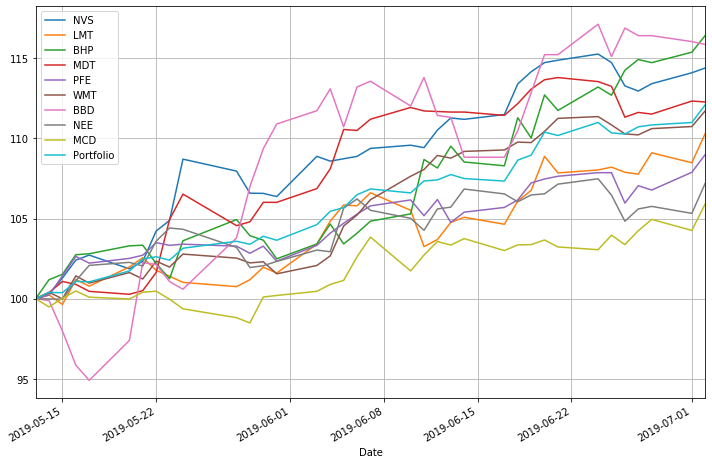

In [15]:
%pylab inline
quote.setup_mask(['NVS', 'LMT', 'BHP', 'MDT', 'PFE', 'WMT', 'BBD', 'NEE', 'MCD'])
quote.graph({'MCD': .03, 'MDT': 0.03, 'WMT': 0.03, 'NVS': 0.03,
  'LMT': 0.1,
  'BHP': 0.29,
  'PFE': 0.13,
  'BBD': 0.14,
  'NEE': 0.22})